In [1]:
import demo_fix
import networkx as nx
import random
from dtos import q, Graph, Flow
from solutions import DynamicSolution, TargetOptimal, TargetNE, GreedySolution, RotatingGreedySolution, GeneticSolution
from common import DiscreteCore, ContinuousCore
from utils import Context

## Graph Generation

In [2]:
num_nodes=14
degree = 2
G = nx.barabasi_albert_graph(num_nodes,degree)
while not nx.is_planar(G) or not nx.is_connected(G):
    G = nx.barabasi_albert_graph(num_nodes,degree)

In [3]:
edges = []
ch=[0, 1, 2, 3, 4, 5]
for e in G.edges:
    edges.append((chr(e[0]+65),chr(e[1]+65), q(random.choice(ch),random.choice(ch),random.choice(ch))))

114


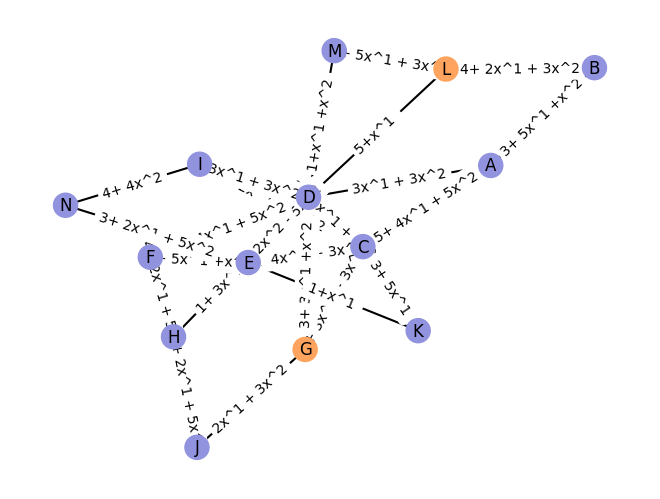

In [4]:
G = Graph('G', 'L', edges)
G.draw()
print(len(G.possible_paths()))

## Comparing Methods

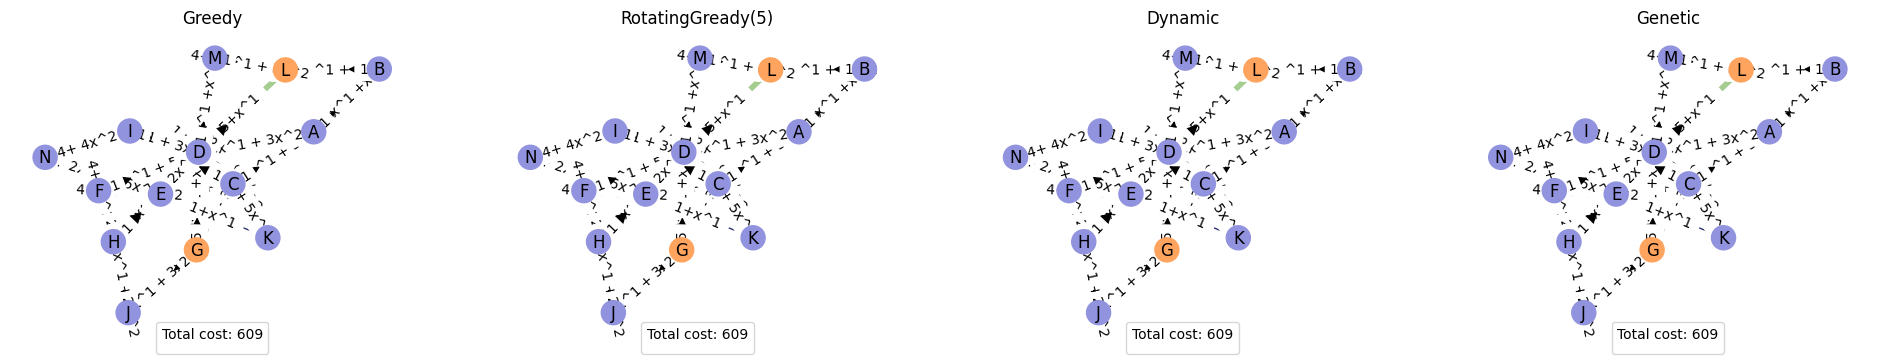

In [5]:
methods_optimal = Context({
    "Greedy": GreedySolution,
    "RotatingGready(5)": RotatingGreedySolution.parametrize(rotations=5),
    "Dynamic": DynamicSolution,
    "Genetic": GeneticSolution.parametrize(num_generations=1000, sol_per_pop=1000)
})
methods_optimal.run_and_draw(G, DiscreteCore(10), TargetOptimal())

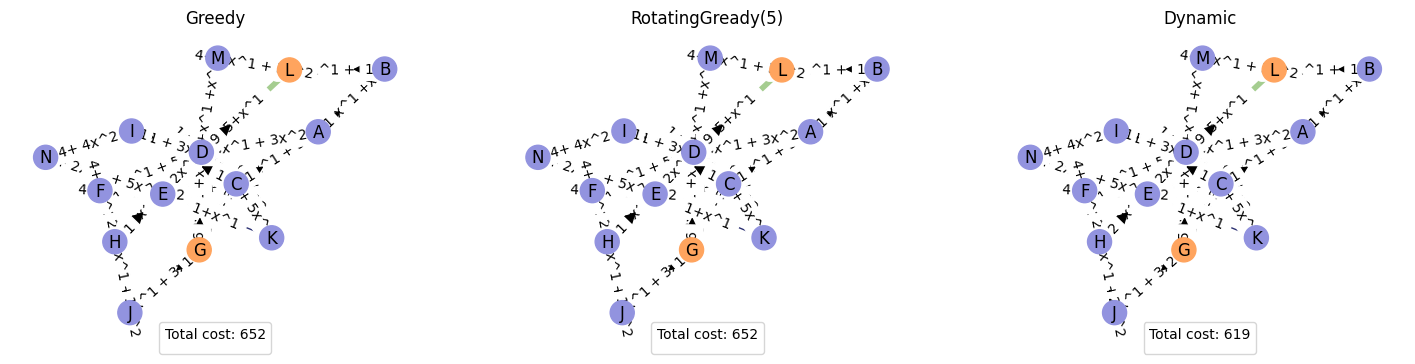

In [6]:
methods_NE = Context({
    "Greedy": GreedySolution,
    "RotatingGready(5)": RotatingGreedySolution.parametrize(rotations=5),
    "Dynamic": DynamicSolution,
})
methods_NE.run_and_draw(G, DiscreteCore(10), TargetNE())